In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("Classified Data",index_col=0)

In [7]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Standardize the Variables

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()

In [11]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
#droping the dependent variable because standarization is done 
#in independent variable

StandardScaler()

In [12]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))
#By calling transform(), the original features are transformed 
#or scaled according to the rules defined by the scaler object, 

In [13]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()  #skipping the last column and picking rest of the column

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(
    scaled_features,df['TARGET CLASS'],test_size=0.30)

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
# K value as !

In [28]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
pred=knn.predict(x_test)

# Prediction and Evaluation

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test,pred))

[[138  12]
 [ 13 137]]


In [33]:
print(classification_report(y_test,pred))  #precision score

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       150
           1       0.92      0.91      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Choosing K value

In [36]:
#create a error list , based on differnt k value ,
#we will store error in this
error_rate=[]

for i in range(1,40):  #from k=1 to k=40
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)   #fit
    pred_i=knn.predict(x_test)   #predict
    error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error Rate')

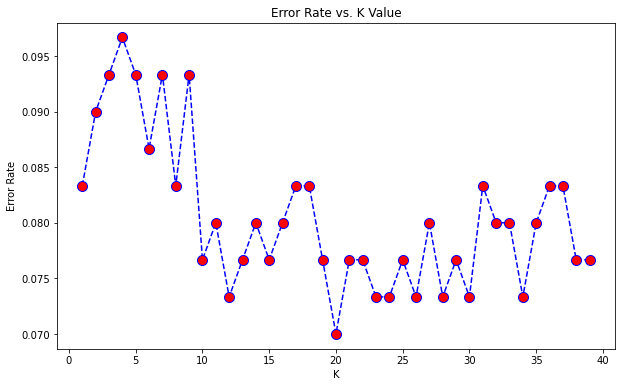

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[82 68]
 [82 68]]


              precision    recall  f1-score   support

           0       0.50      0.55      0.52       150
           1       0.50      0.45      0.48       150

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300



In [39]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[65 85]
 [81 69]]


              precision    recall  f1-score   support

           0       0.45      0.43      0.44       150
           1       0.45      0.46      0.45       150

    accuracy                           0.45       300
   macro avg       0.45      0.45      0.45       300
weighted avg       0.45      0.45      0.45       300

